# Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import re
import pickle
import math
import glob
import matplotlib.pyplot as plt
import os
import time

In [ ]:
from tensorflow.keras import layers
from IPython import display
from sklearn.model_selection import train_test_split

# Loading Data

In [ ]:
!gdown --id 1v9CBx_z-TwrCByZVhjzb7nxPTgEfRjIY
!gdown --id 14s4Efv9GoOcR1X-cyD-9a0xEKto2K95e

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1v9CBx_z-TwrCByZVhjzb7nxPTgEfRjIY
To: D:\FypResearch\Text Summarizer\GANs\version 1\wikiHowCleanedData.csv

  0%|          | 0.00/398M [00:00<?, ?B/s]
  0%|          | 524k/398M [00:00<07:04, 936kB/s]
  0%|          | 1.05M/398M [00:01<07:12, 919kB/s]
  0%|          | 1.57M/398M [00:01<06:09, 1.07MB/s]
  1%|          | 2.10M/398M [00:01<05:50, 1.13MB/s]
  1%|          | 2.62M/398M [00:02<04:44, 1.39MB/s]
  1%|          | 3.15M/398M [00:02<04:18, 1.53MB/s]
  1%|          | 3.67M/398M [00:02<05:07, 1.28MB/s]
  1%|1         | 4.19M/398M [00:03<05:05, 1.29MB/s]
  1%|1         | 4.72M/398M [00:03<04:19, 1.51MB/s]
  1%|1         | 5.24M/398M [00:03<03:56, 1.66MB/s]
  1%|1         | 5.77M/398M [00:04<0

 25%|##5       | 101M/398M [00:57<02:35, 1.91MB/s]
 26%|##5       | 102M/398M [00:57<02:36, 1.89MB/s]
 26%|##5       | 102M/398M [00:58<03:01, 1.63MB/s]
 26%|##5       | 103M/398M [00:58<03:29, 1.41MB/s]
 26%|##5       | 103M/398M [00:59<02:43, 1.80MB/s]
 26%|##6       | 104M/398M [00:59<02:36, 1.88MB/s]
 26%|##6       | 104M/398M [00:59<02:50, 1.73MB/s]
 26%|##6       | 105M/398M [00:59<02:17, 2.13MB/s]
 26%|##6       | 105M/398M [00:59<02:09, 2.25MB/s]
 27%|##6       | 106M/398M [01:00<02:16, 2.14MB/s]
 27%|##6       | 106M/398M [01:00<02:16, 2.14MB/s]
 27%|##6       | 107M/398M [01:00<01:56, 2.50MB/s]
 27%|##7       | 107M/398M [01:01<02:30, 1.93MB/s]
 27%|##7       | 109M/398M [01:01<02:09, 2.23MB/s]
 27%|##7       | 109M/398M [01:01<02:04, 2.31MB/s]
 28%|##7       | 110M/398M [01:01<02:01, 2.38MB/s]
 28%|##7       | 110M/398M [01:02<02:18, 2.09MB/s]
 28%|##7       | 111M/398M [01:02<01:47, 2.67MB/s]
 28%|##8       | 112M/398M [01:03<02:44, 1.74MB/s]
 28%|##8       | 112M/398M [01:

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14s4Efv9GoOcR1X-cyD-9a0xEKto2K95e
To: D:\FypResearch\Text Summarizer\GANs\version 1\glove.6B.100d.txt

  0%|          | 0.00/347M [00:00<?, ?B/s]
  0%|          | 524k/347M [00:00<08:55, 647kB/s]
  0%|          | 1.05M/347M [00:01<05:35, 1.03MB/s]
  0%|          | 1.57M/347M [00:01<04:33, 1.26MB/s]
  1%|          | 2.10M/347M [00:01<03:43, 1.54MB/s]
  1%|          | 2.62M/347M [00:02<04:17, 1.34MB/s]
  1%|          | 3.15M/347M [00:02<04:06, 1.40MB/s]
  1%|1         | 3.67M/347M [00:02<04:27, 1.28MB/s]
  1%|1         | 4.19M/347M [00:03<04:03, 1.41MB/s]
  1%|1         | 4.72M/347M [00:03<04:12, 1.36MB/s]
  2%|1         | 5.24M/347M [00:03<03:50, 1.49MB/s]
  2%|1         | 5.77M/347M [00:04<03:50

In [ ]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is B471-4626

 Directory of D:\FypResearch\Text Summarizer\GANs\version 1

05/03/2022  12:15 AM    <DIR>          .
05/03/2022  12:15 AM    <DIR>          ..
05/03/2022  12:09 AM    <DIR>          .ipynb_checkpoints
05/03/2022  12:15 AM       347,116,733 glove.6B.100d.txt
05/03/2022  12:15 AM           134,020 Transformer_and_GAN_based_Summarizer.ipynb
05/03/2022  12:12 AM       397,955,275 wikiHowCleanedData.csv
               3 File(s)    745,206,028 bytes
               3 Dir(s)  271,091,544,064 bytes free


In [ ]:
wikiHowCleanedDF = pd.read_csv("wikiHowCleanedData.csv")

# Data Preprocessing

In [ ]:
# changing the Datatype of datapoints in Dataset to String 
wikiHowCleanedDF.cleaned_text=wikiHowCleanedDF.cleaned_text.astype(str)
wikiHowCleanedDF.cleaned_summary=wikiHowCleanedDF.cleaned_summary.astype(str)

In [ ]:
# creating new column with amount of word contain in text source and summary
wikiHowCleanedDF['cleaned_text_word_count'] = wikiHowCleanedDF[['cleaned_text']].apply(lambda x: len(x[0].split(' ')), axis=1)
wikiHowCleanedDF['cleaned_summary_word_count'] = wikiHowCleanedDF[['cleaned_summary']].apply(lambda x: len(x[0].split(' ')), axis=1)

In [ ]:
wikiHowCleanedDF.head()

,Unnamed: 0,cleaned_text,cleaned_summary,cleaned_text_word_count,cleaned_summary_word_count
0,0,photographer keep necessary lens cords batteri...,<go> keep related supplies in the same area ma...,332,85
1,1,see image drawing develops step step however i...,<go> create sketch in the neopoprealist manner...,342,129
2,2,possible become vfx artist without college deg...,<go> get bachelor degree enroll in studio base...,250,37
3,3,best art investors research pieces art buy som...,<go> start with some experience or interest in...,468,125
4,4,start planning project work likely gathering s...,<go> keep your reference materials sketches ar...,233,63


In [ ]:
# Droping the rows that containing more words in summary than the Document 
wikiHowCleanedDF.drop(wikiHowCleanedDF[wikiHowCleanedDF['cleaned_text_word_count'] < wikiHowCleanedDF['cleaned_summary_word_count']].index, inplace = True)

# Train/Test split preparation

In [ ]:
#spliting the data in to train and test sets 
document,document_test,summary,summary_test= train_test_split(
    wikiHowCleanedDF['cleaned_text'],
    wikiHowCleanedDF['cleaned_summary'],
    test_size=0.004,random_state=0,
    shuffle=True)

In [ ]:
print("Traning Document Shape : "+str(document.shape))
print("Traning summary Shape : "+str(summary.shape))

print()

print("Testing Document Shape : "+str(document_test.shape))
print("Testing summary Shape : "+str(summary_test.shape))

Traning Document Shape : (168155,)
Traning summary Shape : (168155,)

Testing Document Shape : (676,)
Testing summary Shape : (676,)


# Dataset Pipeline 

## Tokenization 

In [ ]:
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'

In [ ]:
document_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)

document_tokenizer.fit_on_texts(document)
summary_tokenizer.fit_on_texts(summary)

inputs = document_tokenizer.texts_to_sequences(document)
targets = summary_tokenizer.texts_to_sequences(summary)

In [ ]:
encoder_vocab_size = len(document_tokenizer.word_index) + 1
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

# vocab_size
encoder_vocab_size, decoder_vocab_size

(149619, 62456)

## maxlen insights

In [ ]:
document_lengths = pd.Series([len(x.split(' ')) for x in document])
summary_lengths = pd.Series([len(x.split(' ')) for x in summary])

In [ ]:
document_lengths.describe()

count    168155.000000
mean        269.082305
std         247.776334
min           5.000000
25%         117.000000
50%         189.000000
75%         319.000000
max        6505.000000
dtype: float64

In [ ]:
summary_lengths.describe()

count    168155.000000
mean         51.753275
std          43.066821
min           4.000000
25%          25.000000
50%          39.000000
75%          66.000000
max        3782.000000
dtype: float64

In [ ]:
encoder_maxlen = 400
decoder_maxlen = 100

## Padding/Truncating sequences

In [ ]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')

In [ ]:
print("Input Data Shape : "+str(inputs.shape))
print("Output Data Shape : "+str(targets.shape))

Input Data Shape : (168155, 400)
Output Data Shape : (168155, 100)


## dataset pipeline Creation

In [ ]:
# casting datatype to int32 
inputs = tf.cast(inputs, dtype=tf.int32)
targets = tf.cast(targets, dtype=tf.int32)

BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [ ]:
# tensorflow Dataset API provide effecient way to do data manipulations when traning the model 
train_dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# The Generator

## Positional Encoding Layer 


for adding notion of position among words as unlike RNN this is non-directional

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

## Masking Layers

- Padding mask for masking "pad" sequences.
- Lookahead mask for masking future words from contributing in prediction of current words in self attention.

In [ ]:
def create_padding_mask(seq):
    # add extra dimensions to add the padding
    # to the attention logits.
    seq = tf.cast(tf.math.equal(seq, 1), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask # (seq_len, seq_len)

In [ ]:
def create_masks(inp, tar):
    
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)
    
    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

## Attention Layers

### Scaled Dot Product

- Calculate the attention weights.

- q, k, v must have matching leading dimensions.

- k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.

- The mask has different shapes depending on its type(padding or look ahead) but it must be broadcastable for addition.

Args:

- q: query shape == (..., seq_len_q, depth) 
- k: key shape == (..., seq_len_k, depth) 
- v: value shape == (..., seq_len_v, depth_v) 

mask: Float tensor with shape broadcastable 
      to (..., seq_len_q, seq_len_k). Defaults to None.

Returns:
output, attention_weights

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    # softmax is normalized on the last axis (seq_len_k) so that the scoresadd up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)# (..., seq_len_q, depth_v)
    
    return output, attention_weights

### Multi-Headed Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model) 
        self.wk = tf.keras.layers.Dense(d_model) 
        self.wv = tf.keras.layers.Dense(d_model) 

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)"""
        
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q) # (batch_size, seq_len, d_model)
        k = self.wk(k) # (batch_size, seq_len, d_model)
        v = self.wv(v) # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask) # (batch_size, seq_len_q, num_heads, depth)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model)) # (batch_size, seq_len_q, d_model)
        output = self.dense(concat_attention) # (batch_size, seq_len_q, d_model)
            
        return output, attention_weights

## Final distribution

Calculate the final distribution, for the pointer-generator model

Args:

- vocab_dists: The vocabulary distributions. List length max_dec_steps of (batch_size, vsize) arrays. The words are in the order they appear in the vocabulary file.

- attn_dists: The attention distributions. List length max_dec_steps of (batch_size, attn_len) arrays

Returns:

- final_dists: The final distributions. List length max_dec_steps of (batch_size, extended_vsize) arrays.

In [ ]:
def _calc_final_dist( _enc_batch_extend_vocab, vocab_dists, attn_dists, p_gens, batch_oov_len, vocab_size, batch_size):

    # Multiply vocab dists by p_gen and attention dists by (1-p_gen)
    vocab_dists = [p_gen * dist for (p_gen,dist) in zip(p_gens, vocab_dists)]
    attn_dists = [(1-p_gen) * dist for (p_gen,dist) in zip(p_gens, attn_dists)]

    # Concatenate some zeros to each vocabulary dist, to hold the probabilities for in-article OOV words
    extended_vsize = vocab_size + batch_oov_len # the maximum (over the batch) size of the extended vocabulary
    extra_zeros = tf.zeros((batch_size, batch_oov_len ))
    vocab_dists_extended = [tf.concat(axis=1, values=[dist, extra_zeros]) for dist in vocab_dists] # list length max_dec_steps of shape (batch_size, extended_vsize)

    # Project the values in the attention distributions onto the appropriate entries in the final distributions
    
    # This means that if a_i = 0.1 and the ith encoder word is w, and w has index 500 in the vocabulary, then we add 0.1 onto the 500th entry of the final distribution
    # This is done for each decoder timestep.
    # This is fiddly; we use tf.scatter_nd to do the projection
    
    batch_nums = tf.range(0, limit=batch_size) # shape (batch_size)
    batch_nums = tf.expand_dims(batch_nums, 1) # shape (batch_size, 1)
    attn_len = tf.shape(_enc_batch_extend_vocab)[1] # number of states we attend over
    batch_nums = tf.tile(batch_nums, [1, attn_len]) # shape (batch_size, attn_len)
    indices = tf.stack( (batch_nums, _enc_batch_extend_vocab), axis=2) # shape (batch_size, enc_t, 2)
    shape = [batch_size, extended_vsize]
    attn_dists_projected = [tf.scatter_nd(indices, copy_dist, shape) for copy_dist in attn_dists] # list length max_dec_steps (batch_size, extended_vsize)

    # Add the vocab distributions and the copy distributions together to get the final distributions
    
    # final_dists is a list length max_dec_steps; each entry is a tensor shape (batch_size, extended_vsize) giving the final distribution for that decoder timestep
    # Note that for decoder timesteps and examples corresponding to a [PAD] token, this is junk - ignore.
    final_dists = [vocab_dist + copy_dist for (vocab_dist,copy_dist) in zip(vocab_dists_extended, attn_dists_projected)]

    return final_dists

## Feed Forward Network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),# (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)# (batch_size, seq_len, d_model)
    ])

## Embedding Layer

In [ ]:
class Embedding(tf.keras.layers.Layer):

    def __init__(self, vocab_size, d_model):
        super(Embedding, self).__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model

        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model)
        self.pos_encoding = positional_encoding(vocab_size, d_model)

    def call(self, x):
        
        embed_x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        embed_x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        embed_x += self.pos_encoding[:, :tf.shape(x)[1], :]
        
        return embed_x

## Transformer Model

### Fundamental Unit of Transformer encoder

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask) # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output) # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)# (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)# (batch_size, input_seq_len, d_model)

        return out2

### Fundamental Unit of Transformer decoder

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask) # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask) # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)# (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)# (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)# (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

### Encoder consisting of multiple EncoderLayer(s)

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x # (batch_size, input_seq_len, d_model)

### Decoder consisting of multiple DecoderLayer(s)

In [ ]:
class Decoder(tf.keras.layers.Layer):
    
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, rate=0.1):
        super(Decoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.depth = d_model // self.num_heads
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
        self.Wh = tf.keras.layers.Dense(1)
        self.Ws = tf.keras.layers.Dense(1)
        self.Wx = tf.keras.layers.Dense(1)
        self.V = tf.keras.layers.Dense(1)


    def call(self, embed_x, enc_output, training, look_ahead_mask, padding_mask):

        attention_weights = {}
        out = self.dropout(embed_x, training=training)

        for i in range(self.num_layers):
            
            out, block1, block2 = self.dec_layers[i](out, enc_output, training,look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        # out.shape == (batch_size, target_seq_len, d_model)

        #context vectors
        enc_out_shape = tf.shape(enc_output)
        context = tf.reshape(enc_output,(enc_out_shape[0], enc_out_shape[1], self.num_heads, self.depth) ) # shape : (batch_size, input_seq_len, num_heads, depth)
        context = tf.transpose(context, [0,2,1,3]) # (batch_size, num_heads, input_seq_len, depth)
        context = tf.expand_dims(context, axis=2)  # (batch_size, num_heads, 1, input_seq_len, depth)

        attn = tf.expand_dims(block2, axis=-1)  # (batch_size, num_heads, target_seq_len, input_seq_len, 1)

        context = context * attn # (batch_size, num_heads, target_seq_len, input_seq_len, depth)
        context = tf.reduce_sum(context, axis=3) # (batch_size, num_heads, target_seq_len, depth)
        context = tf.transpose(context, [0,2,1,3]) # (batch_size, target_seq_len, num_heads, depth)
        context = tf.reshape(context, (tf.shape(context)[0], tf.shape(context)[1], self.d_model)) # (batch_size, target_seq_len, d_model)

        # P_gens computing
        a = self.Wx(embed_x)
        b = self.Ws(out)
        c = self.Wh(context)
        p_gens = tf.sigmoid(self.V(a + b + c))

        return out, attention_weights,  p_gens

### Transformer

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, vocab_size,batch_size, rate=0.1):
        super(Transformer, self).__init__()

        self.num_layers =num_layers
        self.vocab_size = vocab_size
        self.batch_size = batch_size
        self.model_depth = d_model
        self.num_heads = num_heads

        self.embedding = Embedding(vocab_size, d_model)
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, vocab_size, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, vocab_size, rate)
        self.final_layer = tf.keras.layers.Dense(vocab_size)


    def call(self, inp, extended_inp,max_oov_len, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        embed_x = self.embedding(inp)
        embed_dec = self.embedding(tar)

        enc_output = self.encoder(embed_x, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights, p_gens = self.decoder(embed_dec, enc_output, training, look_ahead_mask, dec_padding_mask)

        output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
        output = tf.nn.softmax(output) # (batch_size, tar_seq_len, vocab_size)
        #output = tf.concat([output, tf.zeros((tf.shape(output)[0], tf.shape(output)[1], max_oov_len))], axis=-1) # (batch_size, targ_seq_len, vocab_size+max_oov_len)

        attn_dists = attention_weights['decoder_layer{}_block2'.format(self.num_layers)] # (batch_size,num_heads, targ_seq_len, inp_seq_len)
        attn_dists = tf.reduce_sum(attn_dists, axis=1)/self.num_heads # (batch_size, targ_seq_len, inp_seq_len)

        final_dists =  _calc_final_dist( extended_inp, tf.unstack(output, axis=1) , tf.unstack(attn_dists, axis=1), tf.unstack(p_gens, axis=1), max_oov_len, self.vocab_size, self.batch_size)
        final_output =tf.stack(final_dists, axis=1)

        return final_output, dec_output, attention_weights

### Initiating Transformer Model

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
encoder_vocab_size = 149619
decoder_vocab_size = 62456

In [ ]:
transformer = Transformer( num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, 
                          input_vocab_size = encoder_vocab_size, target_vocab_size = decoder_vocab_size, 
                          pe_input=encoder_vocab_size,pe_target=decoder_vocab_size)

# The Discriminator

## Word Embedding

In [ ]:
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    values = line.split()
    embeddings_index[values[0]]= np.asarray(values[1:],dtype='float32')
f.close()
print(f'Found {len(embeddings_index)} word vectors')

Found 400000 word vectors


In [ ]:
embedding_dim = decoder_maxlen
embedding_matrix= np.zeros((decoder_vocab_size,embedding_dim))
for word, index in summary_tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[index]= embedding_vector

## Discriminator Model

"""
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    """

In [ ]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Embedding(decoder_vocab_size,
                    embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(filters=250,kernel_size=5,padding='valid',activation='elu'))
  model.add(layers.MaxPooling1D())
  model.add(layers.Conv1D(filters=250,kernel_size=3,padding='valid',activation='elu'))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(units=250, activation='elu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [ ]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         6245600   
                                                                 
 dropout_22 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 250)         125250    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 250)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         187750    
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                       

# Loss and Otimizers

In [ ]:
generatorLoss = tf.keras.metrics.Mean(name='generatorLoss')
discriminatorLoss = tf.keras.metrics.Mean(name='discriminatorLoss')

In [ ]:
# This method returns a helper function to compute cross entropy loss
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
sparse_cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

## Discriminator loss

In [ ]:
def discriminator_loss(real_output, fake_output):

    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    
    return total_loss

## Generator loss

In [ ]:
def generator_loss(real, pred):
  
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = sparse_cross_entropy(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

## Optimizers

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# Save checkpoints

In [ ]:
checkpoint_dir = 'checkpoints'

ckpt = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=transformer,
                                 discriminator=discriminator)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_dir, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

# Training

## Define the training loop

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(inp, tar):

    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      
      predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
      
      predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
     

      real_output = discriminator(tar_real, training=True)
      fake_output = discriminator(predicted_id, training=True)

      gen_loss = generator_loss(tar_real, predictions)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, transformer.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, transformer.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    generatorLoss(gen_loss)
    discriminatorLoss(disc_loss)

## Training the Model 

In [ ]:
EPOCHS = 100

In [ ]:
column_names = ['Epoch','Time', 'Generator_Loss','Discriminator_Loss']
training_Report = pd.DataFrame(columns = column_names)

In [ ]:
def train(dataset, epochs,report):

  for epoch in range(epochs):
      start = time.time()

      for (batch, (inp, tar)) in enumerate(dataset):
          train_step(inp, tar)
      
          # 151947 samples
          # we display 3 batch results -- 0th, middle and last one (approx)
          # 151947 / 128 (batch size) ~ 1,187; 1,187 / 2 = 593
          
          if batch % 593 == 0:
              print ('Epoch {} Batch {} generator Loss {:.4f} discriminator Loss {:.4f}'.format(epoch + 1, batch, generatorLoss.result(),discriminatorLoss.result()))

      if (epoch + 1) % 5 == 0:
          ckpt_save_path = ckpt_manager.save()
          print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
      
      print ('Epoch {} generator Loss {:.4f} discriminator Loss {:.4f}'.format(epoch + 1, generatorLoss.result(),discriminatorLoss.result()))

      update_row = {
            'Epoch':epoch + 1 ,
            'Time': time.time() - start,
            'Generator_Loss':generatorLoss.result() ,
            'Discriminator_Loss':discriminatorLoss.result() ,}
      
      row_to_add = pd.Series(update_row,name= str(epoch))
      report = report.append(row_to_add)

      print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

  return report  

In [ ]:
training_Report = train(train_dataset, EPOCHS,training_Report)

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1 Batch 0 generator Loss 11.0375 discriminator Loss 1.4698
Epoch 1 Batch 593 generator Loss 8.8808 discriminator Loss 0.1764
Epoch 1 Batch 1186 generator Loss 7.7323 discriminator Loss 0.0917
Epoch 1 Batch 1779 generator Loss 7.1403 discriminator Loss 0.0641
Epoch 1 Batch 2372 generator Loss 6.7674 discriminator Loss 0.0536
Epoch 1 generator Loss 6.6430 discriminator Loss 0.0510


C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Time taken for 1 epoch: 881.8595037460327 secs

Epoch 2 Batch 0 generator Loss 6.6426 discriminator Loss 0.0510
Epoch 2 Batch 593 generator Loss 6.4034 discriminator Loss 0.0474
Epoch 2 Batch 1186 generator Loss 6.2145 discriminator Loss 0.0450
Epoch 2 Batch 1779 generator Loss 6.0616 discriminator Loss 0.0435
Epoch 2 Batch 2372 generator Loss 5.9329 discriminator Loss 0.0412
Epoch 2 generator Loss 5.8842 discriminator Loss 0.0404
Time taken for 1 epoch: 861.4498174190521 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 3 Batch 0 generator Loss 5.8841 discriminator Loss 0.0404
Epoch 3 Batch 593 generator Loss 5.7791 discriminator Loss 0.0383
Epoch 3 Batch 1186 generator Loss 5.6875 discriminator Loss 0.0361
Epoch 3 Batch 1779 generator Loss 5.6068 discriminator Loss 0.0343
Epoch 3 Batch 2372 generator Loss 5.5355 discriminator Loss 0.0327
Epoch 3 generator Loss 5.5072 discriminator Loss 0.0321
Time taken for 1 epoch: 862.4787149429321 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 4 Batch 0 generator Loss 5.5071 discriminator Loss 0.0321
Epoch 4 Batch 593 generator Loss 5.4457 discriminator Loss 0.0308
Epoch 4 Batch 1186 generator Loss 5.3902 discriminator Loss 0.0295
Epoch 4 Batch 1779 generator Loss 5.3393 discriminator Loss 0.0284
Epoch 4 Batch 2372 generator Loss 5.2935 discriminator Loss 0.0274
Epoch 4 generator Loss 5.2753 discriminator Loss 0.0270
Time taken for 1 epoch: 861.422116279602 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 5 Batch 0 generator Loss 5.2752 discriminator Loss 0.0269
Epoch 5 Batch 593 generator Loss 5.2348 discriminator Loss 0.0260
Epoch 5 Batch 1186 generator Loss 5.1969 discriminator Loss 0.0251
Epoch 5 Batch 1779 generator Loss 5.1620 discriminator Loss 0.0243
Epoch 5 Batch 2372 generator Loss 5.1297 discriminator Loss 0.0236
Saving checkpoint for epoch 5 at checkpoints\ckpt-1
Epoch 5 generator Loss 5.1168 discriminator Loss 0.0234
Time taken for 1 epoch: 862.3744521141052 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 6 Batch 0 generator Loss 5.1167 discriminator Loss 0.0234
Epoch 6 Batch 593 generator Loss 5.0877 discriminator Loss 0.0227
Epoch 6 Batch 1186 generator Loss 5.0600 discriminator Loss 0.0221
Epoch 6 Batch 1779 generator Loss 5.0344 discriminator Loss 0.0216
Epoch 6 Batch 2372 generator Loss 5.0101 discriminator Loss 0.0211
Epoch 6 generator Loss 5.0003 discriminator Loss 0.0208
Time taken for 1 epoch: 861.6913955211639 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 7 Batch 0 generator Loss 5.0002 discriminator Loss 0.0208
Epoch 7 Batch 593 generator Loss 4.9782 discriminator Loss 0.0203
Epoch 7 Batch 1186 generator Loss 4.9567 discriminator Loss 0.0198
Epoch 7 Batch 1779 generator Loss 4.9367 discriminator Loss 0.0194
Epoch 7 Batch 2372 generator Loss 4.9177 discriminator Loss 0.0190
Epoch 7 generator Loss 4.9098 discriminator Loss 0.0188
Time taken for 1 epoch: 860.4616327285767 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 8 Batch 0 generator Loss 4.9098 discriminator Loss 0.0188
Epoch 8 Batch 593 generator Loss 4.8921 discriminator Loss 0.0184
Epoch 8 Batch 1186 generator Loss 4.8750 discriminator Loss 0.0181
Epoch 8 Batch 1779 generator Loss 4.8588 discriminator Loss 0.0177
Epoch 8 Batch 2372 generator Loss 4.8433 discriminator Loss 0.0173
Epoch 8 generator Loss 4.8369 discriminator Loss 0.0171
Time taken for 1 epoch: 864.1706085205078 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 9 Batch 0 generator Loss 4.8369 discriminator Loss 0.0171
Epoch 9 Batch 593 generator Loss 4.8223 discriminator Loss 0.0168
Epoch 9 Batch 1186 generator Loss 4.8080 discriminator Loss 0.0165
Epoch 9 Batch 1779 generator Loss 4.7947 discriminator Loss 0.0162
Epoch 9 Batch 2372 generator Loss 4.7816 discriminator Loss 0.0160
Epoch 9 generator Loss 4.7762 discriminator Loss 0.0158
Time taken for 1 epoch: 861.936883687973 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 10 Batch 0 generator Loss 4.7762 discriminator Loss 0.0158
Epoch 10 Batch 593 generator Loss 4.7640 discriminator Loss 0.0156
Epoch 10 Batch 1186 generator Loss 4.7518 discriminator Loss 0.0153
Epoch 10 Batch 1779 generator Loss 4.7404 discriminator Loss 0.0150
Epoch 10 Batch 2372 generator Loss 4.7293 discriminator Loss 0.0148
Saving checkpoint for epoch 10 at checkpoints\ckpt-2
Epoch 10 generator Loss 4.7246 discriminator Loss 0.0147
Time taken for 1 epoch: 866.0887262821198 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 11 Batch 0 generator Loss 4.7246 discriminator Loss 0.0147
Epoch 11 Batch 593 generator Loss 4.7141 discriminator Loss 0.0145
Epoch 11 Batch 1186 generator Loss 4.7037 discriminator Loss 0.0142
Epoch 11 Batch 1779 generator Loss 4.6937 discriminator Loss 0.0141
Epoch 11 Batch 2372 generator Loss 4.6841 discriminator Loss 0.0139
Epoch 11 generator Loss 4.6800 discriminator Loss 0.0138
Time taken for 1 epoch: 862.5558731555939 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 12 Batch 0 generator Loss 4.6800 discriminator Loss 0.0138
Epoch 12 Batch 593 generator Loss 4.6709 discriminator Loss 0.0136
Epoch 12 Batch 1186 generator Loss 4.6617 discriminator Loss 0.0134
Epoch 12 Batch 1779 generator Loss 4.6530 discriminator Loss 0.0132
Epoch 12 Batch 2372 generator Loss 4.6444 discriminator Loss 0.0131
Epoch 12 generator Loss 4.6409 discriminator Loss 0.0130
Time taken for 1 epoch: 864.7690064907074 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 13 Batch 0 generator Loss 4.6408 discriminator Loss 0.0130
Epoch 13 Batch 593 generator Loss 4.6328 discriminator Loss 0.0129
Epoch 13 Batch 1186 generator Loss 4.6246 discriminator Loss 0.0128
Epoch 13 Batch 1779 generator Loss 4.6168 discriminator Loss 0.0126
Epoch 13 Batch 2372 generator Loss 4.6094 discriminator Loss 0.0124
Epoch 13 generator Loss 4.6062 discriminator Loss 0.0124
Time taken for 1 epoch: 864.1338374614716 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 14 Batch 0 generator Loss 4.6062 discriminator Loss 0.0124
Epoch 14 Batch 593 generator Loss 4.5990 discriminator Loss 0.0122
Epoch 14 Batch 1186 generator Loss 4.5917 discriminator Loss 0.0121
Epoch 14 Batch 1779 generator Loss 4.5848 discriminator Loss 0.0120
Epoch 14 Batch 2372 generator Loss 4.5780 discriminator Loss 0.0119
Epoch 14 generator Loss 4.5752 discriminator Loss 0.0118
Time taken for 1 epoch: 864.5025897026062 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 15 Batch 0 generator Loss 4.5751 discriminator Loss 0.0118
Epoch 15 Batch 593 generator Loss 4.5687 discriminator Loss 0.0117
Epoch 15 Batch 1186 generator Loss 4.5621 discriminator Loss 0.0116
Epoch 15 Batch 1779 generator Loss 4.5559 discriminator Loss 0.0114
Epoch 15 Batch 2372 generator Loss 4.5498 discriminator Loss 0.0113
Saving checkpoint for epoch 15 at checkpoints\ckpt-3
Epoch 15 generator Loss 4.5472 discriminator Loss 0.0113
Time taken for 1 epoch: 865.0772223472595 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 16 Batch 0 generator Loss 4.5472 discriminator Loss 0.0113
Epoch 16 Batch 593 generator Loss 4.5414 discriminator Loss 0.0112
Epoch 16 Batch 1186 generator Loss 4.5354 discriminator Loss 0.0111
Epoch 16 Batch 1779 generator Loss 4.5297 discriminator Loss 0.0110
Epoch 16 Batch 2372 generator Loss 4.5241 discriminator Loss 0.0109
Epoch 16 generator Loss 4.5218 discriminator Loss 0.0109
Time taken for 1 epoch: 864.0626423358917 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 17 Batch 0 generator Loss 4.5218 discriminator Loss 0.0109
Epoch 17 Batch 593 generator Loss 4.5165 discriminator Loss 0.0108
Epoch 17 Batch 1186 generator Loss 4.5111 discriminator Loss 0.0107
Epoch 17 Batch 1779 generator Loss 4.5058 discriminator Loss 0.0106
Epoch 17 Batch 2372 generator Loss 4.5007 discriminator Loss 0.0105
Epoch 17 generator Loss 4.4986 discriminator Loss 0.0105
Time taken for 1 epoch: 865.3102581501007 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 18 Batch 0 generator Loss 4.4986 discriminator Loss 0.0105
Epoch 18 Batch 593 generator Loss 4.4937 discriminator Loss 0.0104
Epoch 18 Batch 1186 generator Loss 4.4886 discriminator Loss 0.0103
Epoch 18 Batch 1779 generator Loss 4.4839 discriminator Loss 0.0102
Epoch 18 Batch 2372 generator Loss 4.4793 discriminator Loss 0.0102
Epoch 18 generator Loss 4.4772 discriminator Loss 0.0101
Time taken for 1 epoch: 863.2844676971436 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 19 Batch 0 generator Loss 4.4772 discriminator Loss 0.0101
Epoch 19 Batch 593 generator Loss 4.4727 discriminator Loss 0.0101
Epoch 19 Batch 1186 generator Loss 4.4681 discriminator Loss 0.0100
Epoch 19 Batch 1779 generator Loss 4.4636 discriminator Loss 0.0099
Epoch 19 Batch 2372 generator Loss 4.4593 discriminator Loss 0.0099
Epoch 19 generator Loss 4.4575 discriminator Loss 0.0099
Time taken for 1 epoch: 865.4451644420624 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 20 Batch 0 generator Loss 4.4575 discriminator Loss 0.0099
Epoch 20 Batch 593 generator Loss 4.4534 discriminator Loss 0.0098
Epoch 20 Batch 1186 generator Loss 4.4491 discriminator Loss 0.0097
Epoch 20 Batch 1779 generator Loss 4.4449 discriminator Loss 0.0097
Epoch 20 Batch 2372 generator Loss 4.4409 discriminator Loss 0.0096
Saving checkpoint for epoch 20 at checkpoints\ckpt-4
Epoch 20 generator Loss 4.4391 discriminator Loss 0.0096
Time taken for 1 epoch: 864.004894733429 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 21 Batch 0 generator Loss 4.4391 discriminator Loss 0.0096
Epoch 21 Batch 593 generator Loss 4.4352 discriminator Loss 0.0095
Epoch 21 Batch 1186 generator Loss 4.4312 discriminator Loss 0.0095
Epoch 21 Batch 1779 generator Loss 4.4274 discriminator Loss 0.0094
Epoch 21 Batch 2372 generator Loss 4.4236 discriminator Loss 0.0093
Epoch 21 generator Loss 4.4220 discriminator Loss 0.0093
Time taken for 1 epoch: 865.5428383350372 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 22 Batch 0 generator Loss 4.4220 discriminator Loss 0.0093
Epoch 22 Batch 593 generator Loss 4.4185 discriminator Loss 0.0093
Epoch 22 Batch 1186 generator Loss 4.4147 discriminator Loss 0.0092
Epoch 22 Batch 1779 generator Loss 4.4111 discriminator Loss 0.0092
Epoch 22 Batch 2372 generator Loss 4.4076 discriminator Loss 0.0091
Epoch 22 generator Loss 4.4061 discriminator Loss 0.0091
Time taken for 1 epoch: 863.6833806037903 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 23 Batch 0 generator Loss 4.4061 discriminator Loss 0.0091
Epoch 23 Batch 593 generator Loss 4.4027 discriminator Loss 0.0091
Epoch 23 Batch 1186 generator Loss 4.3992 discriminator Loss 0.0090
Epoch 23 Batch 1779 generator Loss 4.3958 discriminator Loss 0.0090
Epoch 23 Batch 2372 generator Loss 4.3925 discriminator Loss 0.0089
Epoch 23 generator Loss 4.3911 discriminator Loss 0.0089
Time taken for 1 epoch: 865.3454988002777 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 24 Batch 0 generator Loss 4.3911 discriminator Loss 0.0089
Epoch 24 Batch 593 generator Loss 4.3879 discriminator Loss 0.0089
Epoch 24 Batch 1186 generator Loss 4.3846 discriminator Loss 0.0088
Epoch 24 Batch 1779 generator Loss 4.3814 discriminator Loss 0.0088
Epoch 24 Batch 2372 generator Loss 4.3783 discriminator Loss 0.0088
Epoch 24 generator Loss 4.3770 discriminator Loss 0.0087
Time taken for 1 epoch: 864.3085753917694 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 25 Batch 0 generator Loss 4.3770 discriminator Loss 0.0087
Epoch 25 Batch 593 generator Loss 4.3740 discriminator Loss 0.0087
Epoch 25 Batch 1186 generator Loss 4.3708 discriminator Loss 0.0087
Epoch 25 Batch 1779 generator Loss 4.3678 discriminator Loss 0.0086
Epoch 25 Batch 2372 generator Loss 4.3649 discriminator Loss 0.0086
Saving checkpoint for epoch 25 at checkpoints\ckpt-5
Epoch 25 generator Loss 4.3636 discriminator Loss 0.0086
Time taken for 1 epoch: 865.8316504955292 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 26 Batch 0 generator Loss 4.3636 discriminator Loss 0.0086
Epoch 26 Batch 593 generator Loss 4.3608 discriminator Loss 0.0086
Epoch 26 Batch 1186 generator Loss 4.3579 discriminator Loss 0.0085
Epoch 26 Batch 1779 generator Loss 4.3550 discriminator Loss 0.0085
Epoch 26 Batch 2372 generator Loss 4.3522 discriminator Loss 0.0085
Epoch 26 generator Loss 4.3510 discriminator Loss 0.0084
Time taken for 1 epoch: 864.9860873222351 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 27 Batch 0 generator Loss 4.3510 discriminator Loss 0.0084
Epoch 27 Batch 593 generator Loss 4.3484 discriminator Loss 0.0084
Epoch 27 Batch 1186 generator Loss 4.3455 discriminator Loss 0.0084
Epoch 27 Batch 1779 generator Loss 4.3428 discriminator Loss 0.0084
Epoch 27 Batch 2372 generator Loss 4.3402 discriminator Loss 0.0083
Epoch 27 generator Loss 4.3390 discriminator Loss 0.0083
Time taken for 1 epoch: 863.9254903793335 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 28 Batch 0 generator Loss 4.3390 discriminator Loss 0.0083
Epoch 28 Batch 593 generator Loss 4.3365 discriminator Loss 0.0083
Epoch 28 Batch 1186 generator Loss 4.3338 discriminator Loss 0.0083
Epoch 28 Batch 1779 generator Loss 4.3313 discriminator Loss 0.0082
Epoch 28 Batch 2372 generator Loss 4.3288 discriminator Loss 0.0082
Epoch 28 generator Loss 4.3277 discriminator Loss 0.0082
Time taken for 1 epoch: 865.8929057121277 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 29 Batch 0 generator Loss 4.3277 discriminator Loss 0.0082
Epoch 29 Batch 593 generator Loss 4.3252 discriminator Loss 0.0082
Epoch 29 Batch 1186 generator Loss 4.3227 discriminator Loss 0.0081
Epoch 29 Batch 1779 generator Loss 4.3202 discriminator Loss 0.0081
Epoch 29 Batch 2372 generator Loss 4.3178 discriminator Loss 0.0081
Epoch 29 generator Loss 4.3168 discriminator Loss 0.0081
Time taken for 1 epoch: 863.3724870681763 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 30 Batch 0 generator Loss 4.3168 discriminator Loss 0.0081
Epoch 30 Batch 593 generator Loss 4.3145 discriminator Loss 0.0081
Epoch 30 Batch 1186 generator Loss 4.3121 discriminator Loss 0.0080
Epoch 30 Batch 1779 generator Loss 4.3098 discriminator Loss 0.0080
Epoch 30 Batch 2372 generator Loss 4.3075 discriminator Loss 0.0080
Saving checkpoint for epoch 30 at checkpoints\ckpt-6
Epoch 30 generator Loss 4.3065 discriminator Loss 0.0080
Time taken for 1 epoch: 865.8273901939392 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 31 Batch 0 generator Loss 4.3065 discriminator Loss 0.0080
Epoch 31 Batch 593 generator Loss 4.3043 discriminator Loss 0.0080
Epoch 31 Batch 1186 generator Loss 4.3020 discriminator Loss 0.0079
Epoch 31 Batch 1779 generator Loss 4.2997 discriminator Loss 0.0079
Epoch 31 Batch 2372 generator Loss 4.2975 discriminator Loss 0.0079
Epoch 31 generator Loss 4.2966 discriminator Loss 0.0079
Time taken for 1 epoch: 861.0245265960693 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 32 Batch 0 generator Loss 4.2966 discriminator Loss 0.0079
Epoch 32 Batch 593 generator Loss 4.2945 discriminator Loss 0.0078
Epoch 32 Batch 1186 generator Loss 4.2923 discriminator Loss 0.0078
Epoch 32 Batch 1779 generator Loss 4.2901 discriminator Loss 0.0078
Epoch 32 Batch 2372 generator Loss 4.2880 discriminator Loss 0.0078
Epoch 32 generator Loss 4.2871 discriminator Loss 0.0077
Time taken for 1 epoch: 862.8338739871979 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 33 Batch 0 generator Loss 4.2871 discriminator Loss 0.0077
Epoch 33 Batch 593 generator Loss 4.2851 discriminator Loss 0.0077
Epoch 33 Batch 1186 generator Loss 4.2830 discriminator Loss 0.0077
Epoch 33 Batch 1779 generator Loss 4.2808 discriminator Loss 0.0077
Epoch 33 Batch 2372 generator Loss 4.2789 discriminator Loss 0.0077
Epoch 33 generator Loss 4.2780 discriminator Loss 0.0077
Time taken for 1 epoch: 860.8822965621948 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 34 Batch 0 generator Loss 4.2780 discriminator Loss 0.0077
Epoch 34 Batch 593 generator Loss 4.2761 discriminator Loss 0.0076
Epoch 34 Batch 1186 generator Loss 4.2740 discriminator Loss 0.0076
Epoch 34 Batch 1779 generator Loss 4.2720 discriminator Loss 0.0076
Epoch 34 Batch 2372 generator Loss 4.2701 discriminator Loss 0.0076
Epoch 34 generator Loss 4.2692 discriminator Loss 0.0076
Time taken for 1 epoch: 862.3890841007233 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 35 Batch 0 generator Loss 4.2692 discriminator Loss 0.0076
Epoch 35 Batch 593 generator Loss 4.2674 discriminator Loss 0.0076
Epoch 35 Batch 1186 generator Loss 4.2654 discriminator Loss 0.0075
Epoch 35 Batch 1779 generator Loss 4.2635 discriminator Loss 0.0075
Epoch 35 Batch 2372 generator Loss 4.2616 discriminator Loss 0.0075
Saving checkpoint for epoch 35 at checkpoints\ckpt-7
Epoch 35 generator Loss 4.2608 discriminator Loss 0.0075
Time taken for 1 epoch: 862.4255771636963 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 36 Batch 0 generator Loss 4.2608 discriminator Loss 0.0075
Epoch 36 Batch 593 generator Loss 4.2590 discriminator Loss 0.0075
Epoch 36 Batch 1186 generator Loss 4.2571 discriminator Loss 0.0075
Epoch 36 Batch 1779 generator Loss 4.2553 discriminator Loss 0.0075
Epoch 36 Batch 2372 generator Loss 4.2535 discriminator Loss 0.0074
Epoch 36 generator Loss 4.2527 discriminator Loss 0.0074
Time taken for 1 epoch: 861.0662095546722 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 37 Batch 0 generator Loss 4.2527 discriminator Loss 0.0074
Epoch 37 Batch 593 generator Loss 4.2510 discriminator Loss 0.0074
Epoch 37 Batch 1186 generator Loss 4.2491 discriminator Loss 0.0074
Epoch 37 Batch 1779 generator Loss 4.2474 discriminator Loss 0.0074
Epoch 37 Batch 2372 generator Loss 4.2457 discriminator Loss 0.0074
Epoch 37 generator Loss 4.2449 discriminator Loss 0.0074
Time taken for 1 epoch: 862.1049041748047 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 38 Batch 0 generator Loss 4.2449 discriminator Loss 0.0073
Epoch 38 Batch 593 generator Loss 4.2432 discriminator Loss 0.0073
Epoch 38 Batch 1186 generator Loss 4.2415 discriminator Loss 0.0073
Epoch 38 Batch 1779 generator Loss 4.2397 discriminator Loss 0.0073
Epoch 38 Batch 2372 generator Loss 4.2381 discriminator Loss 0.0073
Epoch 38 generator Loss 4.2374 discriminator Loss 0.0073
Time taken for 1 epoch: 861.0199108123779 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 39 Batch 0 generator Loss 4.2374 discriminator Loss 0.0073
Epoch 39 Batch 593 generator Loss 4.2357 discriminator Loss 0.0073
Epoch 39 Batch 1186 generator Loss 4.2340 discriminator Loss 0.0072
Epoch 39 Batch 1779 generator Loss 4.2324 discriminator Loss 0.0072
Epoch 39 Batch 2372 generator Loss 4.2308 discriminator Loss 0.0072
Epoch 39 generator Loss 4.2301 discriminator Loss 0.0072
Time taken for 1 epoch: 862.9651029109955 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 40 Batch 0 generator Loss 4.2301 discriminator Loss 0.0072
Epoch 40 Batch 593 generator Loss 4.2285 discriminator Loss 0.0072
Epoch 40 Batch 1186 generator Loss 4.2268 discriminator Loss 0.0072
Epoch 40 Batch 1779 generator Loss 4.2252 discriminator Loss 0.0072
Epoch 40 Batch 2372 generator Loss 4.2237 discriminator Loss 0.0071
Saving checkpoint for epoch 40 at checkpoints\ckpt-8
Epoch 40 generator Loss 4.2230 discriminator Loss 0.0071
Time taken for 1 epoch: 861.0527529716492 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 41 Batch 0 generator Loss 4.2230 discriminator Loss 0.0071
Epoch 41 Batch 593 generator Loss 4.2215 discriminator Loss 0.0071
Epoch 41 Batch 1186 generator Loss 4.2199 discriminator Loss 0.0071
Epoch 41 Batch 1779 generator Loss 4.2183 discriminator Loss 0.0071
Epoch 41 Batch 2372 generator Loss 4.2168 discriminator Loss 0.0071
Epoch 41 generator Loss 4.2162 discriminator Loss 0.0071
Time taken for 1 epoch: 862.6919074058533 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 42 Batch 0 generator Loss 4.2161 discriminator Loss 0.0071
Epoch 42 Batch 593 generator Loss 4.2147 discriminator Loss 0.0071
Epoch 42 Batch 1186 generator Loss 4.2131 discriminator Loss 0.0070
Epoch 42 Batch 1779 generator Loss 4.2116 discriminator Loss 0.0070
Epoch 42 Batch 2372 generator Loss 4.2101 discriminator Loss 0.0070
Epoch 42 generator Loss 4.2095 discriminator Loss 0.0070
Time taken for 1 epoch: 860.453774690628 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 43 Batch 0 generator Loss 4.2095 discriminator Loss 0.0070
Epoch 43 Batch 593 generator Loss 4.2081 discriminator Loss 0.0070
Epoch 43 Batch 1186 generator Loss 4.2066 discriminator Loss 0.0070
Epoch 43 Batch 1779 generator Loss 4.2051 discriminator Loss 0.0070
Epoch 43 Batch 2372 generator Loss 4.2037 discriminator Loss 0.0069
Epoch 43 generator Loss 4.2031 discriminator Loss 0.0069
Time taken for 1 epoch: 862.2348184585571 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 44 Batch 0 generator Loss 4.2031 discriminator Loss 0.0069
Epoch 44 Batch 593 generator Loss 4.2017 discriminator Loss 0.0069
Epoch 44 Batch 1186 generator Loss 4.2002 discriminator Loss 0.0069
Epoch 44 Batch 1779 generator Loss 4.1988 discriminator Loss 0.0069
Epoch 44 Batch 2372 generator Loss 4.1974 discriminator Loss 0.0069
Epoch 44 generator Loss 4.1968 discriminator Loss 0.0069
Time taken for 1 epoch: 860.1492719650269 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 45 Batch 0 generator Loss 4.1968 discriminator Loss 0.0069
Epoch 45 Batch 593 generator Loss 4.1955 discriminator Loss 0.0069
Epoch 45 Batch 1186 generator Loss 4.1941 discriminator Loss 0.0069
Epoch 45 Batch 1779 generator Loss 4.1927 discriminator Loss 0.0068
Epoch 45 Batch 2372 generator Loss 4.1913 discriminator Loss 0.0068
Saving checkpoint for epoch 45 at checkpoints\ckpt-9
Epoch 45 generator Loss 4.1908 discriminator Loss 0.0068
Time taken for 1 epoch: 862.1184935569763 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 46 Batch 0 generator Loss 4.1908 discriminator Loss 0.0068
Epoch 46 Batch 593 generator Loss 4.1895 discriminator Loss 0.0068
Epoch 46 Batch 1186 generator Loss 4.1881 discriminator Loss 0.0068
Epoch 46 Batch 1779 generator Loss 4.1868 discriminator Loss 0.0068
Epoch 46 Batch 2372 generator Loss 4.1855 discriminator Loss 0.0068
Epoch 46 generator Loss 4.1849 discriminator Loss 0.0068
Time taken for 1 epoch: 861.43634724617 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 47 Batch 0 generator Loss 4.1849 discriminator Loss 0.0068
Epoch 47 Batch 593 generator Loss 4.1836 discriminator Loss 0.0068
Epoch 47 Batch 1186 generator Loss 4.1822 discriminator Loss 0.0067
Epoch 47 Batch 1779 generator Loss 4.1810 discriminator Loss 0.0067
Epoch 47 Batch 2372 generator Loss 4.1797 discriminator Loss 0.0067
Epoch 47 generator Loss 4.1791 discriminator Loss 0.0067
Time taken for 1 epoch: 860.9187786579132 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 48 Batch 0 generator Loss 4.1791 discriminator Loss 0.0067
Epoch 48 Batch 593 generator Loss 4.1779 discriminator Loss 0.0067
Epoch 48 Batch 1186 generator Loss 4.1766 discriminator Loss 0.0067
Epoch 48 Batch 1779 generator Loss 4.1753 discriminator Loss 0.0067
Epoch 48 Batch 2372 generator Loss 4.1741 discriminator Loss 0.0067
Epoch 48 generator Loss 4.1735 discriminator Loss 0.0067
Time taken for 1 epoch: 861.9139966964722 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 49 Batch 0 generator Loss 4.1735 discriminator Loss 0.0067
Epoch 49 Batch 593 generator Loss 4.1723 discriminator Loss 0.0067
Epoch 49 Batch 1186 generator Loss 4.1710 discriminator Loss 0.0066
Epoch 49 Batch 1779 generator Loss 4.1698 discriminator Loss 0.0066
Epoch 49 Batch 2372 generator Loss 4.1686 discriminator Loss 0.0066
Epoch 49 generator Loss 4.1681 discriminator Loss 0.0066
Time taken for 1 epoch: 859.9577751159668 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 50 Batch 0 generator Loss 4.1681 discriminator Loss 0.0066
Epoch 50 Batch 593 generator Loss 4.1669 discriminator Loss 0.0066
Epoch 50 Batch 1186 generator Loss 4.1657 discriminator Loss 0.0066
Epoch 50 Batch 1779 generator Loss 4.1645 discriminator Loss 0.0066
Epoch 50 Batch 2372 generator Loss 4.1633 discriminator Loss 0.0066
Saving checkpoint for epoch 50 at checkpoints\ckpt-10
Epoch 50 generator Loss 4.1628 discriminator Loss 0.0066
Time taken for 1 epoch: 863.7830109596252 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 51 Batch 0 generator Loss 4.1628 discriminator Loss 0.0066
Epoch 51 Batch 593 generator Loss 4.1616 discriminator Loss 0.0066
Epoch 51 Batch 1186 generator Loss 4.1604 discriminator Loss 0.0065
Epoch 51 Batch 1779 generator Loss 4.1592 discriminator Loss 0.0065
Epoch 51 Batch 2372 generator Loss 4.1581 discriminator Loss 0.0065
Epoch 51 generator Loss 4.1576 discriminator Loss 0.0065
Time taken for 1 epoch: 859.988692522049 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 52 Batch 0 generator Loss 4.1576 discriminator Loss 0.0065
Epoch 52 Batch 593 generator Loss 4.1565 discriminator Loss 0.0065
Epoch 52 Batch 1186 generator Loss 4.1553 discriminator Loss 0.0065
Epoch 52 Batch 1779 generator Loss 4.1542 discriminator Loss 0.0065
Epoch 52 Batch 2372 generator Loss 4.1531 discriminator Loss 0.0065
Epoch 52 generator Loss 4.1526 discriminator Loss 0.0065
Time taken for 1 epoch: 862.7371778488159 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 53 Batch 0 generator Loss 4.1526 discriminator Loss 0.0065
Epoch 53 Batch 593 generator Loss 4.1515 discriminator Loss 0.0065
Epoch 53 Batch 1186 generator Loss 4.1503 discriminator Loss 0.0065
Epoch 53 Batch 1779 generator Loss 4.1492 discriminator Loss 0.0065
Epoch 53 Batch 2372 generator Loss 4.1481 discriminator Loss 0.0064
Epoch 53 generator Loss 4.1476 discriminator Loss 0.0064
Time taken for 1 epoch: 859.9525928497314 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 54 Batch 0 generator Loss 4.1476 discriminator Loss 0.0064
Epoch 54 Batch 593 generator Loss 4.1466 discriminator Loss 0.0064
Epoch 54 Batch 1186 generator Loss 4.1454 discriminator Loss 0.0064
Epoch 54 Batch 1779 generator Loss 4.1443 discriminator Loss 0.0064
Epoch 54 Batch 2372 generator Loss 4.1433 discriminator Loss 0.0064
Epoch 54 generator Loss 4.1428 discriminator Loss 0.0064
Time taken for 1 epoch: 862.7368054389954 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 55 Batch 0 generator Loss 4.1428 discriminator Loss 0.0064
Epoch 55 Batch 593 generator Loss 4.1418 discriminator Loss 0.0064
Epoch 55 Batch 1186 generator Loss 4.1407 discriminator Loss 0.0064
Epoch 55 Batch 1779 generator Loss 4.1396 discriminator Loss 0.0064
Epoch 55 Batch 2372 generator Loss 4.1385 discriminator Loss 0.0064
Saving checkpoint for epoch 55 at checkpoints\ckpt-11
Epoch 55 generator Loss 4.1381 discriminator Loss 0.0064
Time taken for 1 epoch: 862.4183337688446 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 56 Batch 0 generator Loss 4.1381 discriminator Loss 0.0064
Epoch 56 Batch 593 generator Loss 4.1371 discriminator Loss 0.0064
Epoch 56 Batch 1186 generator Loss 4.1360 discriminator Loss 0.0063
Epoch 56 Batch 1779 generator Loss 4.1350 discriminator Loss 0.0063
Epoch 56 Batch 2372 generator Loss 4.1339 discriminator Loss 0.0063
Epoch 56 generator Loss 4.1335 discriminator Loss 0.0063
Time taken for 1 epoch: 861.7607185840607 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 57 Batch 0 generator Loss 4.1335 discriminator Loss 0.0063
Epoch 57 Batch 593 generator Loss 4.1325 discriminator Loss 0.0063
Epoch 57 Batch 1186 generator Loss 4.1314 discriminator Loss 0.0063
Epoch 57 Batch 1779 generator Loss 4.1304 discriminator Loss 0.0063
Epoch 57 Batch 2372 generator Loss 4.1294 discriminator Loss 0.0063
Epoch 57 generator Loss 4.1290 discriminator Loss 0.0063
Time taken for 1 epoch: 861.416300535202 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 58 Batch 0 generator Loss 4.1290 discriminator Loss 0.0063
Epoch 58 Batch 593 generator Loss 4.1280 discriminator Loss 0.0063
Epoch 58 Batch 1186 generator Loss 4.1270 discriminator Loss 0.0063
Epoch 58 Batch 1779 generator Loss 4.1260 discriminator Loss 0.0063
Epoch 58 Batch 2372 generator Loss 4.1250 discriminator Loss 0.0063
Epoch 58 generator Loss 4.1246 discriminator Loss 0.0063
Time taken for 1 epoch: 860.797881603241 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 59 Batch 0 generator Loss 4.1246 discriminator Loss 0.0063
Epoch 59 Batch 593 generator Loss 4.1236 discriminator Loss 0.0063
Epoch 59 Batch 1186 generator Loss 4.1226 discriminator Loss 0.0062
Epoch 59 Batch 1779 generator Loss 4.1216 discriminator Loss 0.0062
Epoch 59 Batch 2372 generator Loss 4.1207 discriminator Loss 0.0062
Epoch 59 generator Loss 4.1203 discriminator Loss 0.0062
Time taken for 1 epoch: 861.8826105594635 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 60 Batch 0 generator Loss 4.1203 discriminator Loss 0.0062
Epoch 60 Batch 593 generator Loss 4.1193 discriminator Loss 0.0062
Epoch 60 Batch 1186 generator Loss 4.1184 discriminator Loss 0.0062
Epoch 60 Batch 1779 generator Loss 4.1174 discriminator Loss 0.0062
Epoch 60 Batch 2372 generator Loss 4.1164 discriminator Loss 0.0062
Saving checkpoint for epoch 60 at checkpoints\ckpt-12
Epoch 60 generator Loss 4.1160 discriminator Loss 0.0062
Time taken for 1 epoch: 861.4982566833496 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 61 Batch 0 generator Loss 4.1160 discriminator Loss 0.0062
Epoch 61 Batch 593 generator Loss 4.1151 discriminator Loss 0.0062
Epoch 61 Batch 1186 generator Loss 4.1141 discriminator Loss 0.0062
Epoch 61 Batch 1779 generator Loss 4.1132 discriminator Loss 0.0062
Epoch 61 Batch 2372 generator Loss 4.1123 discriminator Loss 0.0062
Epoch 61 generator Loss 4.1119 discriminator Loss 0.0062
Time taken for 1 epoch: 862.4935853481293 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 62 Batch 0 generator Loss 4.1119 discriminator Loss 0.0062
Epoch 62 Batch 593 generator Loss 4.1110 discriminator Loss 0.0062
Epoch 62 Batch 1186 generator Loss 4.1100 discriminator Loss 0.0061
Epoch 62 Batch 1779 generator Loss 4.1091 discriminator Loss 0.0061
Epoch 62 Batch 2372 generator Loss 4.1082 discriminator Loss 0.0061
Epoch 62 generator Loss 4.1078 discriminator Loss 0.0061
Time taken for 1 epoch: 862.1432750225067 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 63 Batch 0 generator Loss 4.1078 discriminator Loss 0.0061
Epoch 63 Batch 593 generator Loss 4.1070 discriminator Loss 0.0061
Epoch 63 Batch 1186 generator Loss 4.1060 discriminator Loss 0.0061
Epoch 63 Batch 1779 generator Loss 4.1051 discriminator Loss 0.0061
Epoch 63 Batch 2372 generator Loss 4.1042 discriminator Loss 0.0061
Epoch 63 generator Loss 4.1039 discriminator Loss 0.0061
Time taken for 1 epoch: 865.839693069458 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 64 Batch 0 generator Loss 4.1039 discriminator Loss 0.0061
Epoch 64 Batch 593 generator Loss 4.1030 discriminator Loss 0.0061
Epoch 64 Batch 1186 generator Loss 4.1021 discriminator Loss 0.0061
Epoch 64 Batch 1779 generator Loss 4.1012 discriminator Loss 0.0061
Epoch 64 Batch 2372 generator Loss 4.1004 discriminator Loss 0.0061
Epoch 64 generator Loss 4.1000 discriminator Loss 0.0061
Time taken for 1 epoch: 863.7852454185486 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 65 Batch 0 generator Loss 4.1000 discriminator Loss 0.0061
Epoch 65 Batch 593 generator Loss 4.0991 discriminator Loss 0.0061
Epoch 65 Batch 1186 generator Loss 4.0982 discriminator Loss 0.0061
Epoch 65 Batch 1779 generator Loss 4.0974 discriminator Loss 0.0060
Epoch 65 Batch 2372 generator Loss 4.0965 discriminator Loss 0.0060
Saving checkpoint for epoch 65 at checkpoints\ckpt-13
Epoch 65 generator Loss 4.0961 discriminator Loss 0.0060
Time taken for 1 epoch: 866.4077820777893 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 66 Batch 0 generator Loss 4.0961 discriminator Loss 0.0060
Epoch 66 Batch 593 generator Loss 4.0953 discriminator Loss 0.0060
Epoch 66 Batch 1186 generator Loss 4.0944 discriminator Loss 0.0060
Epoch 66 Batch 1779 generator Loss 4.0936 discriminator Loss 0.0060
Epoch 66 Batch 2372 generator Loss 4.0927 discriminator Loss 0.0060
Epoch 66 generator Loss 4.0924 discriminator Loss 0.0060
Time taken for 1 epoch: 863.9212164878845 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 67 Batch 0 generator Loss 4.0924 discriminator Loss 0.0060
Epoch 67 Batch 593 generator Loss 4.0916 discriminator Loss 0.0060
Epoch 67 Batch 1186 generator Loss 4.0907 discriminator Loss 0.0060
Epoch 67 Batch 1779 generator Loss 4.0899 discriminator Loss 0.0060
Epoch 67 Batch 2372 generator Loss 4.0890 discriminator Loss 0.0060
Epoch 67 generator Loss 4.0887 discriminator Loss 0.0060
Time taken for 1 epoch: 865.4574062824249 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 68 Batch 0 generator Loss 4.0887 discriminator Loss 0.0060
Epoch 68 Batch 593 generator Loss 4.0879 discriminator Loss 0.0060
Epoch 68 Batch 1186 generator Loss 4.0871 discriminator Loss 0.0060
Epoch 68 Batch 1779 generator Loss 4.0862 discriminator Loss 0.0060
Epoch 68 Batch 2372 generator Loss 4.0854 discriminator Loss 0.0059
Epoch 68 generator Loss 4.0851 discriminator Loss 0.0059
Time taken for 1 epoch: 865.6705350875854 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 69 Batch 0 generator Loss 4.0851 discriminator Loss 0.0059
Epoch 69 Batch 593 generator Loss 4.0843 discriminator Loss 0.0059
Epoch 69 Batch 1186 generator Loss 4.0835 discriminator Loss 0.0059
Epoch 69 Batch 1779 generator Loss 4.0827 discriminator Loss 0.0059
Epoch 69 Batch 2372 generator Loss 4.0819 discriminator Loss 0.0059
Epoch 69 generator Loss 4.0815 discriminator Loss 0.0059
Time taken for 1 epoch: 864.5836551189423 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 70 Batch 0 generator Loss 4.0815 discriminator Loss 0.0059
Epoch 70 Batch 593 generator Loss 4.0808 discriminator Loss 0.0059
Epoch 70 Batch 1186 generator Loss 4.0799 discriminator Loss 0.0059
Epoch 70 Batch 1779 generator Loss 4.0791 discriminator Loss 0.0059
Epoch 70 Batch 2372 generator Loss 4.0784 discriminator Loss 0.0059
Saving checkpoint for epoch 70 at checkpoints\ckpt-14
Epoch 70 generator Loss 4.0780 discriminator Loss 0.0059
Time taken for 1 epoch: 866.3529088497162 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 71 Batch 0 generator Loss 4.0780 discriminator Loss 0.0059
Epoch 71 Batch 593 generator Loss 4.0773 discriminator Loss 0.0059
Epoch 71 Batch 1186 generator Loss 4.0764 discriminator Loss 0.0059
Epoch 71 Batch 1779 generator Loss 4.0757 discriminator Loss 0.0059
Epoch 71 Batch 2372 generator Loss 4.0749 discriminator Loss 0.0059
Epoch 71 generator Loss 4.0746 discriminator Loss 0.0059
Time taken for 1 epoch: 861.7458319664001 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 72 Batch 0 generator Loss 4.0746 discriminator Loss 0.0059
Epoch 72 Batch 593 generator Loss 4.0738 discriminator Loss 0.0059
Epoch 72 Batch 1186 generator Loss 4.0730 discriminator Loss 0.0059
Epoch 72 Batch 1779 generator Loss 4.0723 discriminator Loss 0.0058
Epoch 72 Batch 2372 generator Loss 4.0715 discriminator Loss 0.0058
Epoch 72 generator Loss 4.0712 discriminator Loss 0.0058
Time taken for 1 epoch: 863.8696401119232 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 73 Batch 0 generator Loss 4.0712 discriminator Loss 0.0058
Epoch 73 Batch 593 generator Loss 4.0705 discriminator Loss 0.0058
Epoch 73 Batch 1186 generator Loss 4.0697 discriminator Loss 0.0058
Epoch 73 Batch 1779 generator Loss 4.0689 discriminator Loss 0.0058
Epoch 73 Batch 2372 generator Loss 4.0682 discriminator Loss 0.0058
Epoch 73 generator Loss 4.0679 discriminator Loss 0.0058
Time taken for 1 epoch: 861.0702228546143 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 74 Batch 0 generator Loss 4.0679 discriminator Loss 0.0058
Epoch 74 Batch 593 generator Loss 4.0672 discriminator Loss 0.0058
Epoch 74 Batch 1186 generator Loss 4.0664 discriminator Loss 0.0058
Epoch 74 Batch 1779 generator Loss 4.0657 discriminator Loss 0.0058
Epoch 74 Batch 2372 generator Loss 4.0649 discriminator Loss 0.0058
Epoch 74 generator Loss 4.0646 discriminator Loss 0.0058
Time taken for 1 epoch: 862.751284122467 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 75 Batch 0 generator Loss 4.0646 discriminator Loss 0.0058
Epoch 75 Batch 593 generator Loss 4.0639 discriminator Loss 0.0058
Epoch 75 Batch 1186 generator Loss 4.0631 discriminator Loss 0.0058
Epoch 75 Batch 1779 generator Loss 4.0624 discriminator Loss 0.0058
Epoch 75 Batch 2372 generator Loss 4.0617 discriminator Loss 0.0058
Saving checkpoint for epoch 75 at checkpoints\ckpt-15
Epoch 75 generator Loss 4.0614 discriminator Loss 0.0058
Time taken for 1 epoch: 861.8909180164337 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 76 Batch 0 generator Loss 4.0614 discriminator Loss 0.0058
Epoch 76 Batch 593 generator Loss 4.0607 discriminator Loss 0.0058
Epoch 76 Batch 1186 generator Loss 4.0600 discriminator Loss 0.0057
Epoch 76 Batch 1779 generator Loss 4.0593 discriminator Loss 0.0057
Epoch 76 Batch 2372 generator Loss 4.0585 discriminator Loss 0.0057
Epoch 76 generator Loss 4.0583 discriminator Loss 0.0057
Time taken for 1 epoch: 861.0252890586853 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 77 Batch 0 generator Loss 4.0582 discriminator Loss 0.0057
Epoch 77 Batch 593 generator Loss 4.0576 discriminator Loss 0.0057
Epoch 77 Batch 1186 generator Loss 4.0568 discriminator Loss 0.0057
Epoch 77 Batch 1779 generator Loss 4.0561 discriminator Loss 0.0057
Epoch 77 Batch 2372 generator Loss 4.0554 discriminator Loss 0.0057
Epoch 77 generator Loss 4.0551 discriminator Loss 0.0057
Time taken for 1 epoch: 860.6767752170563 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 78 Batch 0 generator Loss 4.0551 discriminator Loss 0.0057
Epoch 78 Batch 593 generator Loss 4.0545 discriminator Loss 0.0057
Epoch 78 Batch 1186 generator Loss 4.0538 discriminator Loss 0.0057
Epoch 78 Batch 1779 generator Loss 4.0531 discriminator Loss 0.0057
Epoch 78 Batch 2372 generator Loss 4.0524 discriminator Loss 0.0057
Epoch 78 generator Loss 4.0521 discriminator Loss 0.0057
Time taken for 1 epoch: 861.6120593547821 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 79 Batch 0 generator Loss 4.0521 discriminator Loss 0.0057
Epoch 79 Batch 593 generator Loss 4.0514 discriminator Loss 0.0057
Epoch 79 Batch 1186 generator Loss 4.0507 discriminator Loss 0.0057
Epoch 79 Batch 1779 generator Loss 4.0500 discriminator Loss 0.0057
Epoch 79 Batch 2372 generator Loss 4.0493 discriminator Loss 0.0057
Epoch 79 generator Loss 4.0491 discriminator Loss 0.0057
Time taken for 1 epoch: 861.5389168262482 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 80 Batch 0 generator Loss 4.0491 discriminator Loss 0.0057
Epoch 80 Batch 593 generator Loss 4.0484 discriminator Loss 0.0057
Epoch 80 Batch 1186 generator Loss 4.0477 discriminator Loss 0.0057
Epoch 80 Batch 1779 generator Loss 4.0470 discriminator Loss 0.0057
Epoch 80 Batch 2372 generator Loss 4.0464 discriminator Loss 0.0057
Saving checkpoint for epoch 80 at checkpoints\ckpt-16
Epoch 80 generator Loss 4.0461 discriminator Loss 0.0057
Time taken for 1 epoch: 863.4317009449005 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 81 Batch 0 generator Loss 4.0461 discriminator Loss 0.0057
Epoch 81 Batch 593 generator Loss 4.0455 discriminator Loss 0.0056
Epoch 81 Batch 1186 generator Loss 4.0448 discriminator Loss 0.0056
Epoch 81 Batch 1779 generator Loss 4.0441 discriminator Loss 0.0056
Epoch 81 Batch 2372 generator Loss 4.0434 discriminator Loss 0.0056
Epoch 81 generator Loss 4.0432 discriminator Loss 0.0056
Time taken for 1 epoch: 864.6724381446838 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 82 Batch 0 generator Loss 4.0432 discriminator Loss 0.0056
Epoch 82 Batch 593 generator Loss 4.0425 discriminator Loss 0.0056
Epoch 82 Batch 1186 generator Loss 4.0419 discriminator Loss 0.0056
Epoch 82 Batch 1779 generator Loss 4.0412 discriminator Loss 0.0056
Epoch 82 Batch 2372 generator Loss 4.0406 discriminator Loss 0.0056
Epoch 82 generator Loss 4.0403 discriminator Loss 0.0056
Time taken for 1 epoch: 862.6458485126495 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 83 Batch 0 generator Loss 4.0403 discriminator Loss 0.0056
Epoch 83 Batch 593 generator Loss 4.0397 discriminator Loss 0.0056
Epoch 83 Batch 1186 generator Loss 4.0390 discriminator Loss 0.0056
Epoch 83 Batch 1779 generator Loss 4.0384 discriminator Loss 0.0056
Epoch 83 Batch 2372 generator Loss 4.0377 discriminator Loss 0.0056
Epoch 83 generator Loss 4.0375 discriminator Loss 0.0056
Time taken for 1 epoch: 864.8533909320831 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 84 Batch 0 generator Loss 4.0375 discriminator Loss 0.0056
Epoch 84 Batch 593 generator Loss 4.0368 discriminator Loss 0.0056
Epoch 84 Batch 1186 generator Loss 4.0362 discriminator Loss 0.0056
Epoch 84 Batch 1779 generator Loss 4.0356 discriminator Loss 0.0056
Epoch 84 Batch 2372 generator Loss 4.0349 discriminator Loss 0.0056
Epoch 84 generator Loss 4.0347 discriminator Loss 0.0056
Time taken for 1 epoch: 862.7745835781097 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 85 Batch 0 generator Loss 4.0347 discriminator Loss 0.0056
Epoch 85 Batch 593 generator Loss 4.0340 discriminator Loss 0.0056
Epoch 85 Batch 1186 generator Loss 4.0334 discriminator Loss 0.0056
Epoch 85 Batch 1779 generator Loss 4.0328 discriminator Loss 0.0056
Epoch 85 Batch 2372 generator Loss 4.0322 discriminator Loss 0.0056
Saving checkpoint for epoch 85 at checkpoints\ckpt-17
Epoch 85 generator Loss 4.0319 discriminator Loss 0.0056
Time taken for 1 epoch: 865.6964395046234 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 86 Batch 0 generator Loss 4.0319 discriminator Loss 0.0056
Epoch 86 Batch 593 generator Loss 4.0313 discriminator Loss 0.0055
Epoch 86 Batch 1186 generator Loss 4.0307 discriminator Loss 0.0055
Epoch 86 Batch 1779 generator Loss 4.0301 discriminator Loss 0.0055
Epoch 86 Batch 2372 generator Loss 4.0295 discriminator Loss 0.0055
Epoch 86 generator Loss 4.0292 discriminator Loss 0.0055
Time taken for 1 epoch: 863.5702111721039 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 87 Batch 0 generator Loss 4.0292 discriminator Loss 0.0055
Epoch 87 Batch 593 generator Loss 4.0286 discriminator Loss 0.0055
Epoch 87 Batch 1186 generator Loss 4.0280 discriminator Loss 0.0055
Epoch 87 Batch 1779 generator Loss 4.0274 discriminator Loss 0.0055
Epoch 87 Batch 2372 generator Loss 4.0268 discriminator Loss 0.0055
Epoch 87 generator Loss 4.0266 discriminator Loss 0.0055
Time taken for 1 epoch: 864.6681780815125 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 88 Batch 0 generator Loss 4.0266 discriminator Loss 0.0055
Epoch 88 Batch 593 generator Loss 4.0260 discriminator Loss 0.0055
Epoch 88 Batch 1186 generator Loss 4.0254 discriminator Loss 0.0055
Epoch 88 Batch 1779 generator Loss 4.0248 discriminator Loss 0.0055
Epoch 88 Batch 2372 generator Loss 4.0242 discriminator Loss 0.0055
Epoch 88 generator Loss 4.0239 discriminator Loss 0.0055
Time taken for 1 epoch: 865.5227568149567 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 89 Batch 0 generator Loss 4.0239 discriminator Loss 0.0055
Epoch 89 Batch 593 generator Loss 4.0234 discriminator Loss 0.0055
Epoch 89 Batch 1186 generator Loss 4.0228 discriminator Loss 0.0055
Epoch 89 Batch 1779 generator Loss 4.0222 discriminator Loss 0.0055
Epoch 89 Batch 2372 generator Loss 4.0216 discriminator Loss 0.0055
Epoch 89 generator Loss 4.0214 discriminator Loss 0.0055
Time taken for 1 epoch: 863.9987018108368 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 90 Batch 0 generator Loss 4.0214 discriminator Loss 0.0055
Epoch 90 Batch 593 generator Loss 4.0208 discriminator Loss 0.0055
Epoch 90 Batch 1186 generator Loss 4.0202 discriminator Loss 0.0055
Epoch 90 Batch 1779 generator Loss 4.0196 discriminator Loss 0.0055
Epoch 90 Batch 2372 generator Loss 4.0191 discriminator Loss 0.0055
Saving checkpoint for epoch 90 at checkpoints\ckpt-18
Epoch 90 generator Loss 4.0188 discriminator Loss 0.0055
Time taken for 1 epoch: 866.6691813468933 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 91 Batch 0 generator Loss 4.0188 discriminator Loss 0.0055
Epoch 91 Batch 593 generator Loss 4.0183 discriminator Loss 0.0055
Epoch 91 Batch 1186 generator Loss 4.0177 discriminator Loss 0.0055
Epoch 91 Batch 1779 generator Loss 4.0171 discriminator Loss 0.0055
Epoch 91 Batch 2372 generator Loss 4.0166 discriminator Loss 0.0055
Epoch 91 generator Loss 4.0163 discriminator Loss 0.0055
Time taken for 1 epoch: 863.0027322769165 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 92 Batch 0 generator Loss 4.0163 discriminator Loss 0.0055
Epoch 92 Batch 593 generator Loss 4.0158 discriminator Loss 0.0054
Epoch 92 Batch 1186 generator Loss 4.0152 discriminator Loss 0.0054
Epoch 92 Batch 1779 generator Loss 4.0147 discriminator Loss 0.0054
Epoch 92 Batch 2372 generator Loss 4.0141 discriminator Loss 0.0054
Epoch 92 generator Loss 4.0139 discriminator Loss 0.0054
Time taken for 1 epoch: 866.1518640518188 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 93 Batch 0 generator Loss 4.0139 discriminator Loss 0.0054
Epoch 93 Batch 593 generator Loss 4.0134 discriminator Loss 0.0054
Epoch 93 Batch 1186 generator Loss 4.0128 discriminator Loss 0.0054
Epoch 93 Batch 1779 generator Loss 4.0123 discriminator Loss 0.0054
Epoch 93 Batch 2372 generator Loss 4.0117 discriminator Loss 0.0054
Epoch 93 generator Loss 4.0115 discriminator Loss 0.0054
Time taken for 1 epoch: 863.9571509361267 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 94 Batch 0 generator Loss 4.0115 discriminator Loss 0.0054
Epoch 94 Batch 593 generator Loss 4.0110 discriminator Loss 0.0054
Epoch 94 Batch 1186 generator Loss 4.0104 discriminator Loss 0.0054
Epoch 94 Batch 1779 generator Loss 4.0099 discriminator Loss 0.0054
Epoch 94 Batch 2372 generator Loss 4.0094 discriminator Loss 0.0054
Epoch 94 generator Loss 4.0091 discriminator Loss 0.0054
Time taken for 1 epoch: 866.1903586387634 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 95 Batch 0 generator Loss 4.0091 discriminator Loss 0.0054
Epoch 95 Batch 593 generator Loss 4.0086 discriminator Loss 0.0054
Epoch 95 Batch 1186 generator Loss 4.0081 discriminator Loss 0.0054
Epoch 95 Batch 1779 generator Loss 4.0075 discriminator Loss 0.0054
Epoch 95 Batch 2372 generator Loss 4.0070 discriminator Loss 0.0054
Saving checkpoint for epoch 95 at checkpoints\ckpt-19
Epoch 95 generator Loss 4.0068 discriminator Loss 0.0054
Time taken for 1 epoch: 865.5463438034058 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 96 Batch 0 generator Loss 4.0068 discriminator Loss 0.0054
Epoch 96 Batch 593 generator Loss 4.0063 discriminator Loss 0.0054
Epoch 96 Batch 1186 generator Loss 4.0057 discriminator Loss 0.0054
Epoch 96 Batch 1779 generator Loss 4.0052 discriminator Loss 0.0054
Epoch 96 Batch 2372 generator Loss 4.0047 discriminator Loss 0.0054
Epoch 96 generator Loss 4.0045 discriminator Loss 0.0054
Time taken for 1 epoch: 865.5548408031464 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 97 Batch 0 generator Loss 4.0045 discriminator Loss 0.0054
Epoch 97 Batch 593 generator Loss 4.0040 discriminator Loss 0.0054
Epoch 97 Batch 1186 generator Loss 4.0035 discriminator Loss 0.0054
Epoch 97 Batch 1779 generator Loss 4.0029 discriminator Loss 0.0054
Epoch 97 Batch 2372 generator Loss 4.0024 discriminator Loss 0.0054
Epoch 97 generator Loss 4.0022 discriminator Loss 0.0054
Time taken for 1 epoch: 864.6892116069794 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 98 Batch 0 generator Loss 4.0022 discriminator Loss 0.0054
Epoch 98 Batch 593 generator Loss 4.0017 discriminator Loss 0.0054
Epoch 98 Batch 1186 generator Loss 4.0012 discriminator Loss 0.0053
Epoch 98 Batch 1779 generator Loss 4.0007 discriminator Loss 0.0053
Epoch 98 Batch 2372 generator Loss 4.0002 discriminator Loss 0.0053
Epoch 98 generator Loss 4.0000 discriminator Loss 0.0053
Time taken for 1 epoch: 865.0482807159424 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 99 Batch 0 generator Loss 4.0000 discriminator Loss 0.0053
Epoch 99 Batch 593 generator Loss 3.9995 discriminator Loss 0.0053
Epoch 99 Batch 1186 generator Loss 3.9990 discriminator Loss 0.0053
Epoch 99 Batch 1779 generator Loss 3.9985 discriminator Loss 0.0053
Epoch 99 Batch 2372 generator Loss 3.9980 discriminator Loss 0.0053
Epoch 99 generator Loss 3.9978 discriminator Loss 0.0053
Time taken for 1 epoch: 865.8709738254547 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


Epoch 100 Batch 0 generator Loss 3.9978 discriminator Loss 0.0053
Epoch 100 Batch 593 generator Loss 3.9973 discriminator Loss 0.0053
Epoch 100 Batch 1186 generator Loss 3.9968 discriminator Loss 0.0053
Epoch 100 Batch 1779 generator Loss 3.9963 discriminator Loss 0.0053
Epoch 100 Batch 2372 generator Loss 3.9958 discriminator Loss 0.0053
Saving checkpoint for epoch 100 at checkpoints\ckpt-20
Epoch 100 generator Loss 3.9956 discriminator Loss 0.0053
Time taken for 1 epoch: 866.1018273830414 secs



C:\Users\Thanveer\AppData\Local\Temp\ipykernel_53832\3551557269.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append(row_to_add)


In [ ]:
training_Report

,Epoch,Time,Generator_Loss,Discriminator_Loss
0,1,880.751694,"tf.Tensor(6.6429667, shape=(), dtype=float32)","tf.Tensor(0.05097658, shape=(), dtype=float32)"
1,2,861.41881,"tf.Tensor(5.884248, shape=(), dtype=float32)","tf.Tensor(0.040350184, shape=(), dtype=float32)"
2,3,862.45771,"tf.Tensor(5.5072002, shape=(), dtype=float32)","tf.Tensor(0.032122757, shape=(), dtype=float32)"
3,4,861.404111,"tf.Tensor(5.275274, shape=(), dtype=float32)","tf.Tensor(0.02695147, shape=(), dtype=float32)"
4,5,862.355448,"tf.Tensor(5.116778, shape=(), dtype=float32)","tf.Tensor(0.023360746, shape=(), dtype=float32)"
...,...,...,...,...
95,96,865.537837,"tf.Tensor(4.0044947, shape=(), dtype=float32)","tf.Tensor(0.0053741145, shape=(), dtype=float32)"
96,97,864.669207,"tf.Tensor(4.00223, shape=(), dtype=float32)","tf.Tensor(0.0053570457, shape=(), dtype=float32)"
97,98,865.030275,"tf.Tensor(3.9999886, shape=(), dtype=float32)","tf.Tensor(0.005343776, shape=(), dtype=float32)"
98,99,865.84897,"tf.Tensor(3.9977763, shape=(), dtype=float32)","tf.Tensor(0.0053263833, shape=(), dtype=float32)"


In [ ]:
#saving the cleaned Dataset as a CSV file
training_Report.to_csv("training_Report_for_100_epochs.csv")

## Plot Tranining Loss

In [ ]:
training_Report['Generator_Loss'] = training_Report['Generator_Loss'].apply(lambda x:float(x))
training_Report['Discriminator_Loss'] = training_Report['Discriminator_Loss'].apply(lambda x: float(x))

In [ ]:
training_Report

,Epoch,Time,Generator_Loss,Discriminator_Loss
0,1,880.751694,6.642967,0.050977
1,2,861.41881,5.884248,0.040350
2,3,862.45771,5.507200,0.032123
3,4,861.404111,5.275274,0.026951
4,5,862.355448,5.116778,0.023361
...,...,...,...,...
95,96,865.537837,4.004495,0.005374
96,97,864.669207,4.002230,0.005357
97,98,865.030275,3.999989,0.005344
98,99,865.84897,3.997776,0.005326


### Discriminator Loss

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


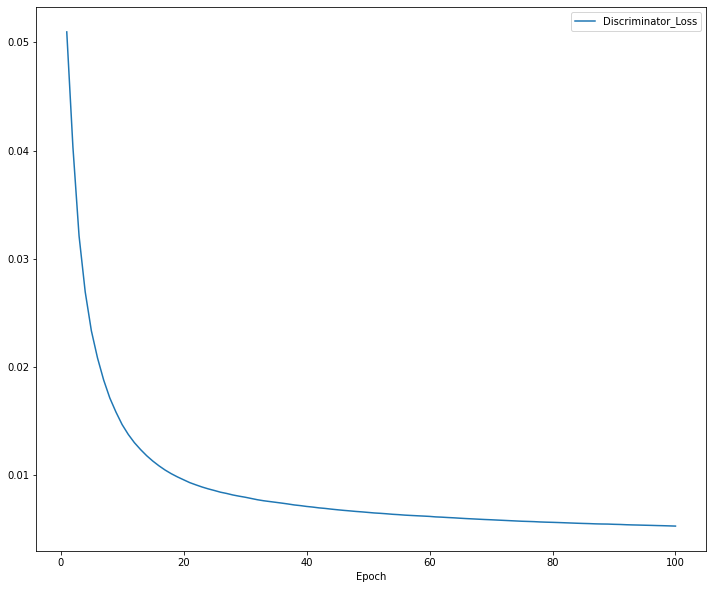

In [ ]:
# plot multiple columns such as population and year from dataframe
training_Report.plot(x="Epoch", y="Discriminator_Loss",
        kind="line", figsize=(12, 10))
 
# display plot
plt.show()

### Generator Loss

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


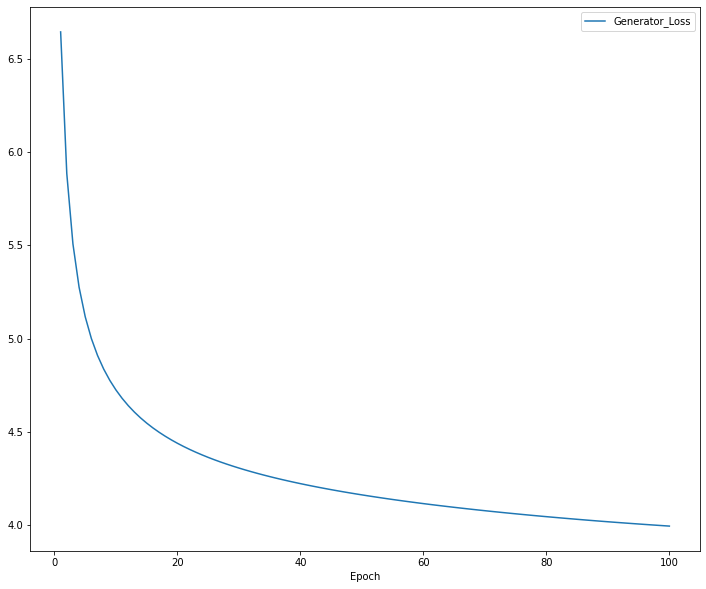

In [ ]:
# plot multiple columns such as population and year from dataframe
training_Report.plot(x="Epoch", y="Generator_Loss",
        kind="line", figsize=(12, 10))
 
# display plot
plt.show()

### Both Loss in one plot 

C:\Users\Thanveer\anaconda3\envs\summarization_v2\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


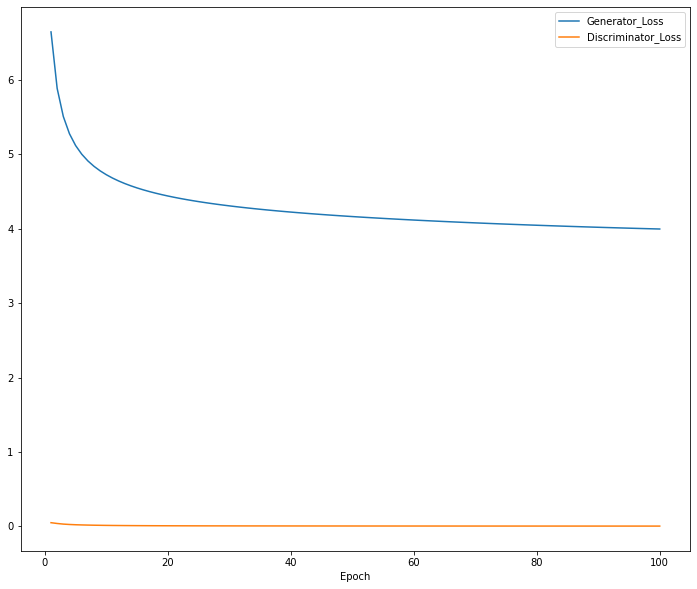

In [ ]:
import matplotlib.pyplot as plt
 
# plot multiple columns such as population and year from dataframe
training_Report.plot(x="Epoch", y=["Generator_Loss", "Discriminator_Loss"],
        kind="line", figsize=(12, 10))
 
# display plot
plt.show()